In [701]:
from cdpr_definition import *

cdpr_spec = mj.MjSpec.from_file("cdpr_8_6.xml")
cdpr_model=cdpr_spec.compile()
cdpr_data= mj.MjData(cdpr_model)
print([actuator.target for actuator in cdpr_spec.actuators])

['cable_tendon_0', 'cable_tendon_1', 'cable_tendon_2', 'cable_tendon_3', 'cable_tendon_4', 'cable_tendon_5', 'cable_tendon_6', 'cable_tendon_7']


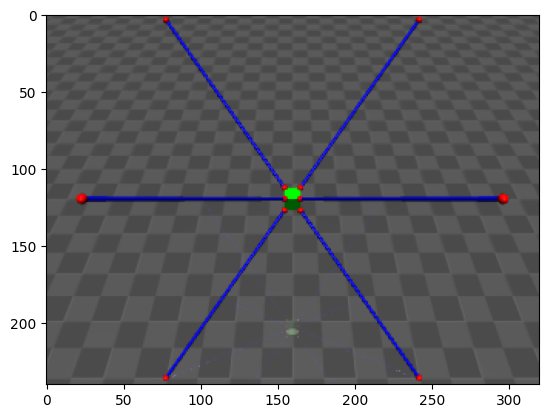

In [702]:
renderer=mj.Renderer(cdpr_model)
mj.mj_step(cdpr_model, cdpr_data)
renderer.update_scene(cdpr_data, camera="main_camera")
render=renderer.render()
plt.imshow(render)
plt.show()

In [703]:
def inverse_kinematics(target_xyz=[0,0,0], target_orientation=[0,0,0]):
   desired_cable_vectors=np.zeros((8,3))
   target_xyz = np.array(target_xyz)
   target_orientation = np.array(target_orientation)
   rotation = R.from_rotvec(target_orientation, degrees=True)
   for cable_index in range(len(proximal_anchor_points)):
      desired_cable_vectors[cable_index,:]=proximal_anchor_points[cable_index,:]-target_xyz-rotation.apply(distal_anchor_points[cable_index,:])
      #print(distal_anchor_points[cable_index,:])
      #print(rotation.apply(distal_anchor_points[cable_index,:]))
   return [np.linalg.norm(desired_cable_vectors[cable_index,:]) for cable_index in range(len(proximal_anchor_points))]

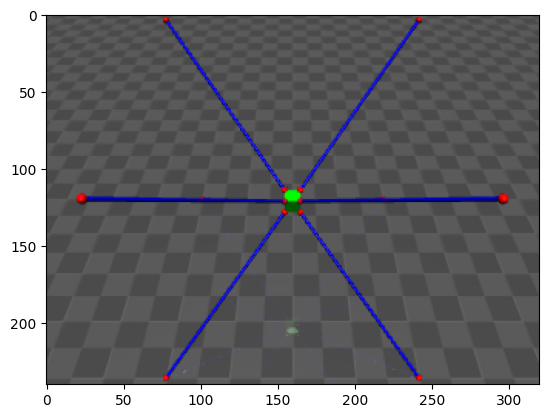

In [704]:
#Controls 0 to 7 inclusive control cable tendons 0 to 7 inclusive.
#Every mujoco simulation step moves forward by 0.002 seconds by default.
desired_position=[0,0,machine_frame_height/2]
desired_orientation=[10,0,0]
cdpr_data.ctrl=inverse_kinematics(target_xyz=desired_position, target_orientation=desired_orientation)
for _ in range(1000):
    mj.mj_step(cdpr_model, cdpr_data)
renderer.update_scene(cdpr_data, camera="main_camera")
render=renderer.render()
plt.imshow(render)
plt.show()

In [707]:
actual_ee_rot_mat=np.stack([cdpr_data.sensor("end_effector_xv").data, cdpr_data.sensor("end_effector_yv").data, cdpr_data.sensor("end_effector_zv").data])
actual_ee_axis_angles=R.from_matrix(actual_ee_rot_mat).as_rotvec(degrees=True)
actual_ee_position=cdpr_data.sensor("end_effector_position").data
actual_ee_position, actual_ee_axis_angles

(array([ 1.91521409e-16, -7.50099538e-16,  3.90214966e+00]),
 array([1.09941477e-14, 7.37656644e-16, 2.22887028e-16]))